## Task 2 : To Explore Supervised Machine Learning

### Simple Linear Regression

In this regression task we have to predict the percentage of marks a student is expected to score based on the no of hours he studied.


Author - Tarun Dyundi

## Importing Libraries

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Visualizing the Dataset - Table

In [373]:
raw_data = "http://bit.ly/w-data"
df = pd.read_csv(raw_data)
print("Reading Data succesfull")
print("Data :")
df.head(10)

Reading Data succesfull
Data :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [375]:
df.shape

(25, 2)

### Describing Data 
Summary statistics, which include things like the mean, standard deviation,  quantile, min, and max of the data.

In [340]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking For Null Values

In [342]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

### Line Plot

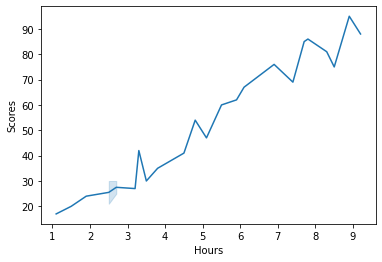

In [377]:
sns.lineplot(x = "Hours", y = "Scores" , data= df)

From here we get an idea that the distribution of data is linear in nature,so we can go with simple linear regression.

### Swarm Plot

Text(0.5, 1.0, 'Time Interval VS Score')

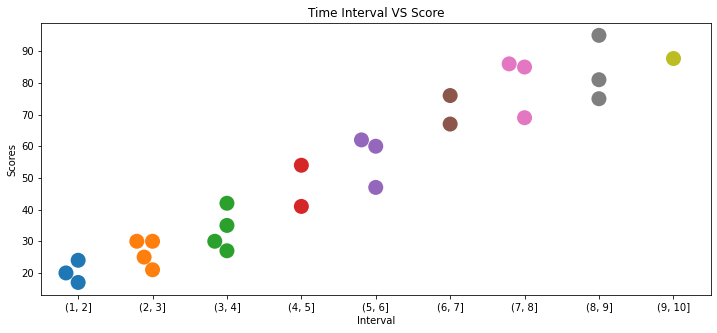

In [378]:
copy = df.copy(deep=True)
plt.figure(figsize=(12,5))
copy["Interval"] = pd.cut(copy["Hours"],[1,2,3,4,5,6,7,8,9,10])
sns.swarmplot(x ="Interval",y ="Scores",data= copy,size = 15)
plt.title("Time Interval VS Score")

From here we can observe that how the score of students vary if they are studying for a particular time interval

### Separation of Independent and Dependent Variables

In [379]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [380]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [381]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Spliting Of Dataset into Training Set and Test Set

In [348]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state=42)

## Model Development

In [349]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("Model Training Done")

Model Training Done


In [350]:
print("Test Data Points:{}".format(x_test))
y_pred = regressor.predict(x_test)

Test Data Points:[[8.3]
 [2.5]
 [2.5]
 [6.9]]


### Camparison of Actual and Predicted Values

In [351]:
final = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
final

,Actual,Predicted
0,81,83.333663
1,30,27.093198
2,21,27.093198
3,76,69.758379


## Model Visualization

Text(0, 0.5, 'Score')

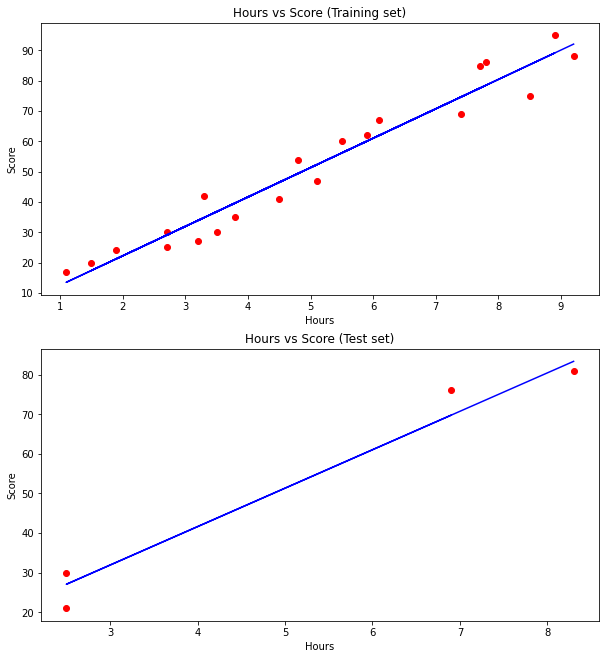

In [387]:
plt.figure(figsize = (10,11))
plt.subplot(2,1,1)
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Hours vs Score (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.subplot(2,1,2)
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Hours vs Score (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')

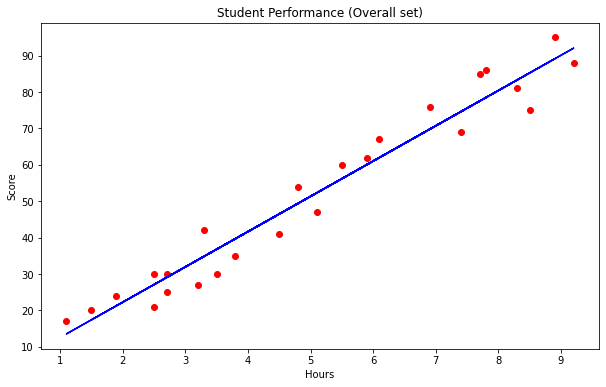

In [368]:
plt.figure(figsize = (10,6))
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Student Performance (Overall set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### Predicting Score if a student studies for about 9.25 hours

In [361]:
hours = 9.25
print("No of hours of study :",hours)
pred = regressor.predict([[hours]])
print("Predicted Score :",round(pred[0],2))

No of hours of study : 9.25
Predicted Score : 92.55


### Evaluating Model Performance

In [355]:
 print("Mean Absolute Error :",round(metrics.mean_absolute_error(y_test,y_pred),2))
print("Root Mean Squared Error :",round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),2))

Mean Absolute Error : 4.39
Root Mean Squared Error : 4.74


### K-Fold Cross Validation Score

In [356]:
accuracies = cross_val_score(regressor,x,y,scoring='r2')
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.81 %
Standard Deviation: 6.88 %
